In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Nettoyage des données

### a) Customers

In [2]:
df_customers = pd.read_csv("customers.csv", sep=",")
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
print(df_customers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [4]:
df_customers = df_customers[df_customers["sex"].str.contains(r'[fm]')]
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [5]:
df_customers = df_customers[df_customers["birth"] >= 1900]
df_customers = df_customers[df_customers["birth"] <= 2022]
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [6]:
def clean_client_id(idclient):
    result = re.search("[c]{1}[_]{1}\d", idclient)
    if result is None:
        return np.NaN
    else:
        return idclient
    return result
df_customers["client_id"] = [clean_client_id(idclient) for idclient in df_customers["client_id"]]
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


### b) Products

In [7]:
df_products = pd.read_csv("products.csv", sep=",")
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [8]:
print(df_products.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


In [9]:
categories = [0, 1, 2] 
df_products = df_products[df_products["categ"].isin(categories)] 
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [10]:
df_products = df_products[df_products["price"] >= 0]
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [11]:
def clean_product_id(idproduct):
    result = re.search("[012]{1}[_]{1}\d", idproduct)
    if result is None:
        return np.NaN
    else:
        return idproduct
    return result
df_products["id_prod"] = [clean_product_id(idproduct) for idproduct in df_products["id_prod"]]
df_products

/var/folders/r7/nyn0pbkd469dh1skmjprpkt80000gn/T/ipykernel_8378/1529827200.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["id_prod"] = [clean_product_id(idproduct) for idproduct in df_products["id_prod"]]


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [12]:
df_products["categ_verif"] = df_products["id_prod"].str[:1]
df_products["categ_verif"] = pd.to_numeric(df_products["categ_verif"], errors='coerce')
df_products["categ_verif"].equals(df_products["categ"])

/var/folders/r7/nyn0pbkd469dh1skmjprpkt80000gn/T/ipykernel_8378/1904568256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["categ_verif"] = df_products["id_prod"].str[:1]
/var/folders/r7/nyn0pbkd469dh1skmjprpkt80000gn/T/ipykernel_8378/1904568256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["categ_verif"] = pd.to_numeric(df_products["categ_verif"], errors='coerce')


True

In [13]:
df_products = df_products.drop(columns=["categ_verif"])
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


### 3) Transactions

In [14]:
df_transactions = pd.read_csv("transactions.csv", sep=",")
df_transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [15]:
print(df_transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [16]:
df_transactions["id_prod_verif"] = df_transactions["id_prod"].isin(df_products["id_prod"])
df_transactions["id_prod_verif"].value_counts()

True     336713
False       303
Name: id_prod_verif, dtype: int64

In [17]:
df_transactions["client_id_verif"] = df_transactions["client_id"].isin(df_customers["client_id"])
df_transactions["client_id_verif"].value_counts()

True     336816
False       200
Name: client_id_verif, dtype: int64

In [18]:
df_transactions = df_transactions.loc[df_transactions["id_prod_verif"], :]
df_transactions = df_transactions.loc[df_transactions["client_id_verif"], :]
df_transactions

,id_prod,date,session_id,client_id,id_prod_verif,client_id_verif
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,True,True
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,True,True
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,True,True
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,True,True
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,True,True
...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,True,True
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,True,True
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,True,True
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,True,True


In [19]:
df_transactions = df_transactions.drop(columns=["id_prod_verif", "client_id_verif"])
df_transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [20]:
df_transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [21]:
df_transactions["date"] = pd.to_datetime(df_transactions["date"],format='%Y-%m-%d %H:%M:%S.%f',errors='coerce')
df_transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [22]:
def clean_session_id(idsession):
    result = re.search("[s]{1}[_]{1}\d", idsession)
    if result is None:
        return np.NaN
    else:
        return idsession
    return result
df_transactions["session_id"] = [clean_session_id(idsession) for idsession in df_transactions["session_id"]]
df_transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [23]:
df = pd.merge(df_transactions,df_products,on='id_prod',how='left')
df = pd.merge(df,df_customers,on='client_id',how='left')
df = df.reindex(columns=['id_prod', 'price', 'categ', 'date', 'session_id', 'client_id', 'sex', 'birth'])
df['age'] = 2022 - df['birth']
df

,id_prod,price,categ,date,session_id,client_id,sex,birth,age
0,0_1483,4.99,0,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45
1,2_226,65.75,2,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,22
2,1_374,10.71,1,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,43
3,0_2186,4.20,0,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,59
4,0_1351,8.99,0,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,42
...,...,...,...,...,...,...,...,...,...
336708,1_671,31.99,1,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,53
336709,0_759,22.99,0,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,31
336710,0_1256,11.03,0,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,54
336711,2_227,50.99,2,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,28


## 2) Analyse des données

### a) Indicateurs de tendances centrales

In [24]:
print("Moyenne des prix des produits vendus :", round(df['price'].mean(),2), "€")
print("Médiane des prix des produits vendus :", round(df['price'].median(),2), "€")
print("Catégorie de produits la plus vendue :", df['categ'].mode())
print("Produit le plus vendu :", df['id_prod'].mode())
print("La majorité des achats ont été faits par des :", df['sex'].mode())
# Le 0 avant le mode correspond au numéro du mode (s'il y en avait 2, le second mode serait précédé d'un 1)

Moyenne des prix des produits vendus : 17.22 €
Médiane des prix des produits vendus : 13.9 €
Catégorie de produits la plus vendue : 0    0
Name: categ, dtype: int64
Produit le plus vendu : 0    1_369
Name: id_prod, dtype: object
La majorité des achats ont été faits par des : 0    m
Name: sex, dtype: object


In [25]:
for gender in df["sex"].unique():
    subset = df[df.sex == gender] # Création du sous-échantillon
    print("-"*20)
    print(gender)
    print("moyenne du prix des produits achetés :\n",round(subset['price'].mean(),2))
    print("médiane du prix des produits achetés :\n",subset['price'].median())
    print("somme du prix des produits achetés :\n",round(subset['price'].sum(),0))
    print("Catégorie de produits la plus vendue :", subset['categ'].mode())
    print("Produit le plus vendu :", subset['id_prod'].mode())
    print("moyenne de l'âge :\n",round(subset['age'].mean(),0))
    print("médiane de l'âge :\n",round(subset['age'].median(),0))

--------------------
f
moyenne du prix des produits achetés :
 17.07
médiane du prix des produits achetés :
 13.94
somme du prix des produits achetés :
 2859122.0
Catégorie de produits la plus vendue : 0    0
Name: categ, dtype: int64
Produit le plus vendu : 0    1_369
Name: id_prod, dtype: object
moyenne de l'âge :
 45.0
médiane de l'âge :
 43.0
--------------------
m
moyenne du prix des produits achetés :
 17.36
médiane du prix des produits achetés :
 13.89
somme du prix des produits achetés :
 2937456.0
Catégorie de produits la plus vendue : 0    0
Name: categ, dtype: int64
Produit le plus vendu : 0    1_417
Name: id_prod, dtype: object
moyenne de l'âge :
 44.0
médiane de l'âge :
 42.0


In [26]:
bins= [18,25,55,110]
labels = ['Jeune','Adulte','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,age_group
0,0_1483,4.99,0,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45,Adulte
1,2_226,65.75,2,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,22,Jeune
2,1_374,10.71,1,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,43,Adulte
3,0_2186,4.20,0,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,59,Senior
4,0_1351,8.99,0,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,42,Adulte
...,...,...,...,...,...,...,...,...,...,...
336708,1_671,31.99,1,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,53,Adulte
336709,0_759,22.99,0,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,31,Adulte
336710,0_1256,11.03,0,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,54,Adulte
336711,2_227,50.99,2,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,28,Adulte


In [27]:
for agegroup in df["age_group"].unique():
    subset = df[df["age_group"] == agegroup] # Création du sous-échantillon
    print("-"*20)
    print(agegroup)
    print("moyenne du prix des produits achetés :\n",round(subset['price'].mean(),2))
    print("médiane du prix des produits achetés :\n",subset['price'].median())
    print("somme du prix des produits achetés :\n",round(subset['price'].sum(),0))
    print("Catégorie de produits la plus vendue :", subset['categ'].mode())
    print("Produit le plus vendu :", subset['id_prod'].mode())
    print("Genre majoritaire des clients :", subset['sex'].mode())

--------------------
Adulte
moyenne du prix des produits achetés :
 15.07
médiane du prix des produits achetés :
 12.86
somme du prix des produits achetés :
 3770377.0
Catégorie de produits la plus vendue : 0    0
Name: categ, dtype: int64
Produit le plus vendu : 0    1_417
Name: id_prod, dtype: object
Genre majoritaire des clients : 0    m
Name: sex, dtype: object
--------------------
Jeune
moyenne du prix des produits achetés :
 41.9
médiane du prix des produits achetés :
 26.25
somme du prix des produits achetés :
 976848.0
Catégorie de produits la plus vendue : 0    2
Name: categ, dtype: int64
Produit le plus vendu : 0    2_112
Name: id_prod, dtype: object
Genre majoritaire des clients : 0    m
Name: sex, dtype: object
--------------------
Senior
moyenne du prix des produits achetés :
 16.59
médiane du prix des produits achetés :
 15.87
somme du prix des produits achetés :
 1049353.0
Catégorie de produits la plus vendue : 0    1
Name: categ, dtype: int64
Produit le plus vendu : 0  

In [28]:
print(round(df.groupby('sex')['price'].mean(),2))
print(round(df.groupby('sex')['price'].agg('mean'),2))

sex
f    17.07
m    17.36
Name: price, dtype: float64
sex
f    17.07
m    17.36
Name: price, dtype: float64


In [29]:
print("mean :\n", df[['sex','age_group','price']].groupby(['sex','age_group']).mean())

mean :
                    price
sex age_group           
f   Jeune      40.134828
    Adulte     15.228762
    Senior     16.578733
m   Jeune      43.362602
    Adulte     14.919937
    Senior     16.602567


### b) Indicateurs de dispersion

In [30]:
for gender in df["sex"].unique():
    subset = df[df.sex == gender] # Création du sous-échantillon
    print("-"*20)
    print(gender)
    print("var price :\n",subset['price'].var(ddof=0))
    print("ect price :\n",subset['price'].std(ddof=0))

--------------------
f
var price :
 301.4641015265119
ect price :
 17.362721604820827
--------------------
m
var price :
 335.9524975801363
ect price :
 18.329006999293124


In [31]:
print("var :\n", df[['sex', 'price']].groupby(['sex']).var(ddof=0))

var :
           price
sex            
f    301.464102
m    335.952498


In [32]:
for gender in df["sex"].unique():
    subset = df[df.sex == gender] # Création du sous-échantillon
    print("-"*20)
    print(gender)
    for agegroup in df["age_group"].unique():
        subset = df[df["age_group"] == agegroup]
        print("-"*3)
        print(agegroup)
        print("var price :\n",subset['price'].var(ddof=0))
        print("ect price :\n",subset['price'].std(ddof=0))
#Résultats qui diffèrent de la cellule suivante car le calcul se fait ici sur le subset et pas la pop totale (?)

--------------------
f
---
Adulte
var price :
 197.90902936795692
ect price :
 14.068014407440621
---
Jeune
var price :
 1534.332978351787
ect price :
 39.17056265043671
---
Senior
var price :
 105.81423383315666
ect price :
 10.286604582327284
--------------------
m
---
Adulte
var price :
 197.90902936795692
ect price :
 14.068014407440621
---
Jeune
var price :
 1534.332978351787
ect price :
 39.17056265043671
---
Senior
var price :
 105.81423383315666
ect price :
 10.286604582327284


In [33]:
print("var :\n", df[['sex','age_group','price']].groupby(['sex','age_group']).var(ddof=0))
#Résultats qui diffèrent de la cellule précédente car le calcul se fait ici sur la pop totale et pas le subset (?)

var :
                      price
sex age_group             
f   Jeune      1496.494189
    Adulte      203.557736
    Senior      104.007660
m   Jeune      1560.978389
    Adulte      192.336496
    Senior      107.816723


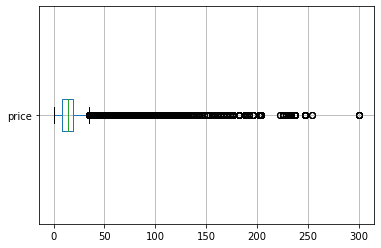

In [34]:
df.boxplot(column="price", vert=False)
plt.show()
#bcp de valeurs extrêmes très élevées (mais reste possible : livres collectors ?)

--------------------
f


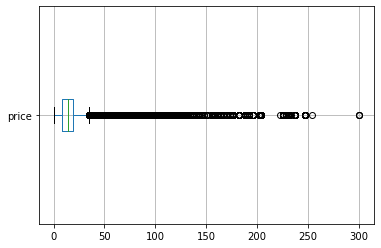

--------------------
m


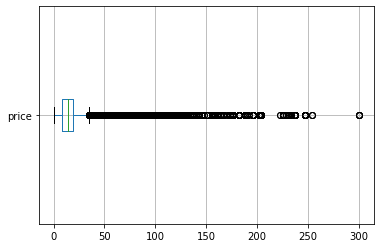

In [35]:
for gender in df["sex"].unique():
    subset = df[df.sex == gender] # Création du sous-échantillon
    print("-"*20)
    print(gender)
    subset.boxplot(column="price", vert=False)
    plt.show()

### c) Courbe de Lorenz et indice de Gini

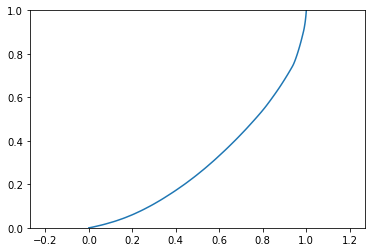

In [36]:
prices = df['price'].values
n = len(prices)
lorenz = np.cumsum(np.sort(prices)) / prices.sum()
lorenz = np.append([0],lorenz)
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [37]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
round(gini, 2)
#Le prix des livres vendus a une répartition moyennement égalitaire

0.39

## 3) Etude des corrélations

### a) Corrélation entre le sexe des clients et les catégories de produits achetés

In [38]:
X = "sex"
Y = "categ"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,103786,55469,8260,167515
m,105640,54266,9292,169198
Total,209426,109735,17552,336713


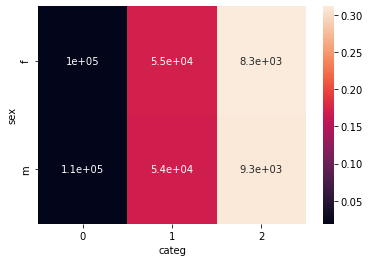

In [39]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

### b) Corrélation entre l'âge des clients et le panier moyen (nombre d'articles et montant total), les catégories de produits achetés et la fréquence d'achat.

In [40]:
df_clients = df[['client_id', 'age', 'session_id', 'date', 'id_prod', "categ", "price"]].copy()
df_clients

,client_id,age,session_id,date,id_prod,categ,price
0,c_4450,45,s_18746,2021-04-10 18:37:28.723910,0_1483,0,4.99
1,c_277,22,s_159142,2022-02-03 01:55:53.276402,2_226,2,65.75
2,c_4270,43,s_94290,2021-09-23 15:13:46.938559,1_374,1,10.71
3,c_4597,59,s_105936,2021-10-17 03:27:18.783634,0_2186,0,4.20
4,c_1242,42,s_63642,2021-07-17 20:34:25.800563,0_1351,0,8.99
...,...,...,...,...,...,...,...
336708,c_3454,53,s_40720,2021-05-28 12:35:46.214839,1_671,1,31.99
336709,c_6268,31,s_50568,2021-06-19 00:19:23.917703,0_759,0,22.99
336710,c_4137,54,s_7219,2021-03-16 17:31:59.442007,0_1256,0,11.03
336711,c_5,28,s_112349,2021-10-30 16:50:15.997750,2_227,2,50.99


In [41]:
nb_sessions_df = df_clients.groupby(['client_id'])['session_id'].nunique()
nb_sessions_df = nb_sessions_df.reset_index()
nb_sessions_df

,client_id,session_id
0,c_1,15
1,c_10,16
2,c_100,3
3,c_1000,42
4,c_1001,24
...,...,...
8595,c_995,5
8596,c_996,36
8597,c_997,10
8598,c_998,13


In [42]:
nb_sessions_df = nb_sessions_df.rename(columns={"session_id" : "nb_sessions"})

In [43]:
df_clients = pd.merge(df_clients,nb_sessions_df,on='client_id',how='left')
df_clients

,client_id,age,session_id,date,id_prod,categ,price,nb_sessions
0,c_4450,45,s_18746,2021-04-10 18:37:28.723910,0_1483,0,4.99,44
1,c_277,22,s_159142,2022-02-03 01:55:53.276402,2_226,2,65.75,7
2,c_4270,43,s_94290,2021-09-23 15:13:46.938559,1_374,1,10.71,24
3,c_4597,59,s_105936,2021-10-17 03:27:18.783634,0_2186,0,4.20,3
4,c_1242,42,s_63642,2021-07-17 20:34:25.800563,0_1351,0,8.99,11
...,...,...,...,...,...,...,...,...
336708,c_3454,53,s_40720,2021-05-28 12:35:46.214839,1_671,1,31.99,2709
336709,c_6268,31,s_50568,2021-06-19 00:19:23.917703,0_759,0,22.99,35
336710,c_4137,54,s_7219,2021-03-16 17:31:59.442007,0_1256,0,11.03,54
336711,c_5,28,s_112349,2021-10-30 16:50:15.997750,2_227,2,50.99,23


In [44]:
print(df_clients['date'].max() - df_clients['date'].min())
df_clients['frequence_achat'] = (df_clients['nb_sessions'] / 364).map('{:.2%}'.format)
df_clients

364 days 23:58:50.197334


,client_id,age,session_id,date,id_prod,categ,price,nb_sessions,frequence_achat
0,c_4450,45,s_18746,2021-04-10 18:37:28.723910,0_1483,0,4.99,44,12.09%
1,c_277,22,s_159142,2022-02-03 01:55:53.276402,2_226,2,65.75,7,1.92%
2,c_4270,43,s_94290,2021-09-23 15:13:46.938559,1_374,1,10.71,24,6.59%
3,c_4597,59,s_105936,2021-10-17 03:27:18.783634,0_2186,0,4.20,3,0.82%
4,c_1242,42,s_63642,2021-07-17 20:34:25.800563,0_1351,0,8.99,11,3.02%
...,...,...,...,...,...,...,...,...,...
336708,c_3454,53,s_40720,2021-05-28 12:35:46.214839,1_671,1,31.99,2709,744.23%
336709,c_6268,31,s_50568,2021-06-19 00:19:23.917703,0_759,0,22.99,35,9.62%
336710,c_4137,54,s_7219,2021-03-16 17:31:59.442007,0_1256,0,11.03,54,14.84%
336711,c_5,28,s_112349,2021-10-30 16:50:15.997750,2_227,2,50.99,23,6.32%


In [45]:
df_clients['nb_products_bought'] = df_clients.groupby(['client_id'])['id_prod'].transform('count')
df_clients['price_products_bought'] = df_clients.groupby(['client_id'])['price'].transform('sum')
df_clients

,client_id,age,session_id,date,id_prod,categ,price,nb_sessions,frequence_achat,nb_products_bought,price_products_bought
0,c_4450,45,s_18746,2021-04-10 18:37:28.723910,0_1483,0,4.99,44,12.09%,100,1186.65
1,c_277,22,s_159142,2022-02-03 01:55:53.276402,2_226,2,65.75,7,1.92%,14,526.75
2,c_4270,43,s_94290,2021-09-23 15:13:46.938559,1_374,1,10.71,24,6.59%,64,878.23
3,c_4597,59,s_105936,2021-10-17 03:27:18.783634,0_2186,0,4.20,3,0.82%,3,33.99
4,c_1242,42,s_63642,2021-07-17 20:34:25.800563,0_1351,0,8.99,11,3.02%,28,388.52
...,...,...,...,...,...,...,...,...,...,...,...
336708,c_3454,53,s_40720,2021-05-28 12:35:46.214839,1_671,1,31.99,2709,744.23%,3273,54442.92
336709,c_6268,31,s_50568,2021-06-19 00:19:23.917703,0_759,0,22.99,35,9.62%,94,1156.49
336710,c_4137,54,s_7219,2021-03-16 17:31:59.442007,0_1256,0,11.03,54,14.84%,72,1189.51
336711,c_5,28,s_112349,2021-10-30 16:50:15.997750,2_227,2,50.99,23,6.32%,45,1282.37


In [46]:
df_clients['panier_achat_nb_produits'] = df_clients['nb_products_bought'] / df_clients['nb_sessions']
df_clients['panier_achat_nb_produits'] = round(df_clients['panier_achat_nb_produits'], 2)
df_clients['panier_achat_montant'] = df_clients['price_products_bought'] / df_clients['nb_sessions']
df_clients['panier_achat_montant'] = round(df_clients['panier_achat_montant'], 2)
df_clients

,client_id,age,session_id,date,id_prod,categ,price,nb_sessions,frequence_achat,nb_products_bought,price_products_bought,panier_achat_nb_produits,panier_achat_montant
0,c_4450,45,s_18746,2021-04-10 18:37:28.723910,0_1483,0,4.99,44,12.09%,100,1186.65,2.27,26.97
1,c_277,22,s_159142,2022-02-03 01:55:53.276402,2_226,2,65.75,7,1.92%,14,526.75,2.00,75.25
2,c_4270,43,s_94290,2021-09-23 15:13:46.938559,1_374,1,10.71,24,6.59%,64,878.23,2.67,36.59
3,c_4597,59,s_105936,2021-10-17 03:27:18.783634,0_2186,0,4.20,3,0.82%,3,33.99,1.00,11.33
4,c_1242,42,s_63642,2021-07-17 20:34:25.800563,0_1351,0,8.99,11,3.02%,28,388.52,2.55,35.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336708,c_3454,53,s_40720,2021-05-28 12:35:46.214839,1_671,1,31.99,2709,744.23%,3273,54442.92,1.21,20.10
336709,c_6268,31,s_50568,2021-06-19 00:19:23.917703,0_759,0,22.99,35,9.62%,94,1156.49,2.69,33.04
336710,c_4137,54,s_7219,2021-03-16 17:31:59.442007,0_1256,0,11.03,54,14.84%,72,1189.51,1.33,22.03
336711,c_5,28,s_112349,2021-10-30 16:50:15.997750,2_227,2,50.99,23,6.32%,45,1282.37,1.96,55.76


In [47]:
df_clients = df_clients.drop(columns=['price_products_bought', 'nb_products_bought'])
df_clients

,client_id,age,session_id,date,id_prod,categ,price,nb_sessions,frequence_achat,panier_achat_nb_produits,panier_achat_montant
0,c_4450,45,s_18746,2021-04-10 18:37:28.723910,0_1483,0,4.99,44,12.09%,2.27,26.97
1,c_277,22,s_159142,2022-02-03 01:55:53.276402,2_226,2,65.75,7,1.92%,2.00,75.25
2,c_4270,43,s_94290,2021-09-23 15:13:46.938559,1_374,1,10.71,24,6.59%,2.67,36.59
3,c_4597,59,s_105936,2021-10-17 03:27:18.783634,0_2186,0,4.20,3,0.82%,1.00,11.33
4,c_1242,42,s_63642,2021-07-17 20:34:25.800563,0_1351,0,8.99,11,3.02%,2.55,35.32
...,...,...,...,...,...,...,...,...,...,...,...
336708,c_3454,53,s_40720,2021-05-28 12:35:46.214839,1_671,1,31.99,2709,744.23%,1.21,20.10
336709,c_6268,31,s_50568,2021-06-19 00:19:23.917703,0_759,0,22.99,35,9.62%,2.69,33.04
336710,c_4137,54,s_7219,2021-03-16 17:31:59.442007,0_1256,0,11.03,54,14.84%,1.33,22.03
336711,c_5,28,s_112349,2021-10-30 16:50:15.997750,2_227,2,50.99,23,6.32%,1.96,55.76


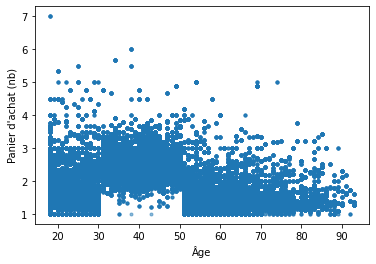

In [48]:
plt.plot(df_clients["age"],df_clients["panier_achat_nb_produits"],'.',alpha=0.5)
plt.xlabel("Âge")
plt.ylabel("Panier d'achat (nb)")
plt.show()

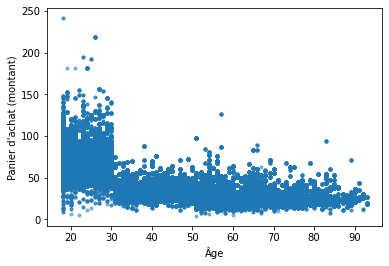

In [49]:
plt.plot(df_clients["age"],df_clients["panier_achat_montant"],'.',alpha=0.5)
plt.xlabel("Âge")
plt.ylabel("Panier d'achat (montant)")
plt.show()

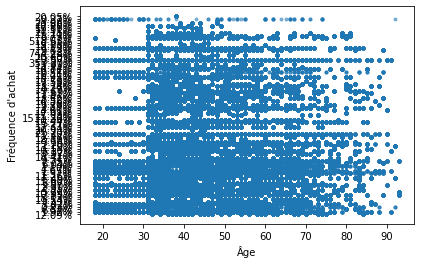

In [50]:
plt.plot(df_clients["age"],df_clients["frequence_achat"],'.',alpha=0.5)
plt.xlabel("Âge")
plt.ylabel("Fréquence d'achat")
plt.show()

<AxesSubplot:xlabel='categ', ylabel='age'>

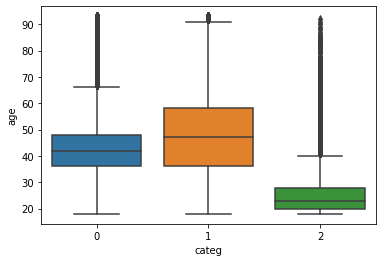

In [55]:
sns.boxplot(x='categ', y='age', data=df_clients)